<a href="https://colab.research.google.com/github/JeyScientist/Deep-Learning/blob/main/count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving video.jpg to video.jpg


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving rap.mp4 to rap.mp4


100%|██████████| 131M/131M [00:00<00:00, 382MB/s]



image 1/1 /content/video.jpg: 480x640 11 persons, 3 cars, 2 buss, 2 trucks, 3560.8ms
Speed: 14.4ms preprocess, 3560.8ms inference, 35.6ms postprocess per image at shape (1, 3, 480, 640)

ACCURATE OBJECT COUNT:
bus: 2 (Avg Conf: 0.50)
car: 3 (Avg Conf: 0.75)
person: 11 (Avg Conf: 0.68)
truck: 2 (Avg Conf: 0.63)


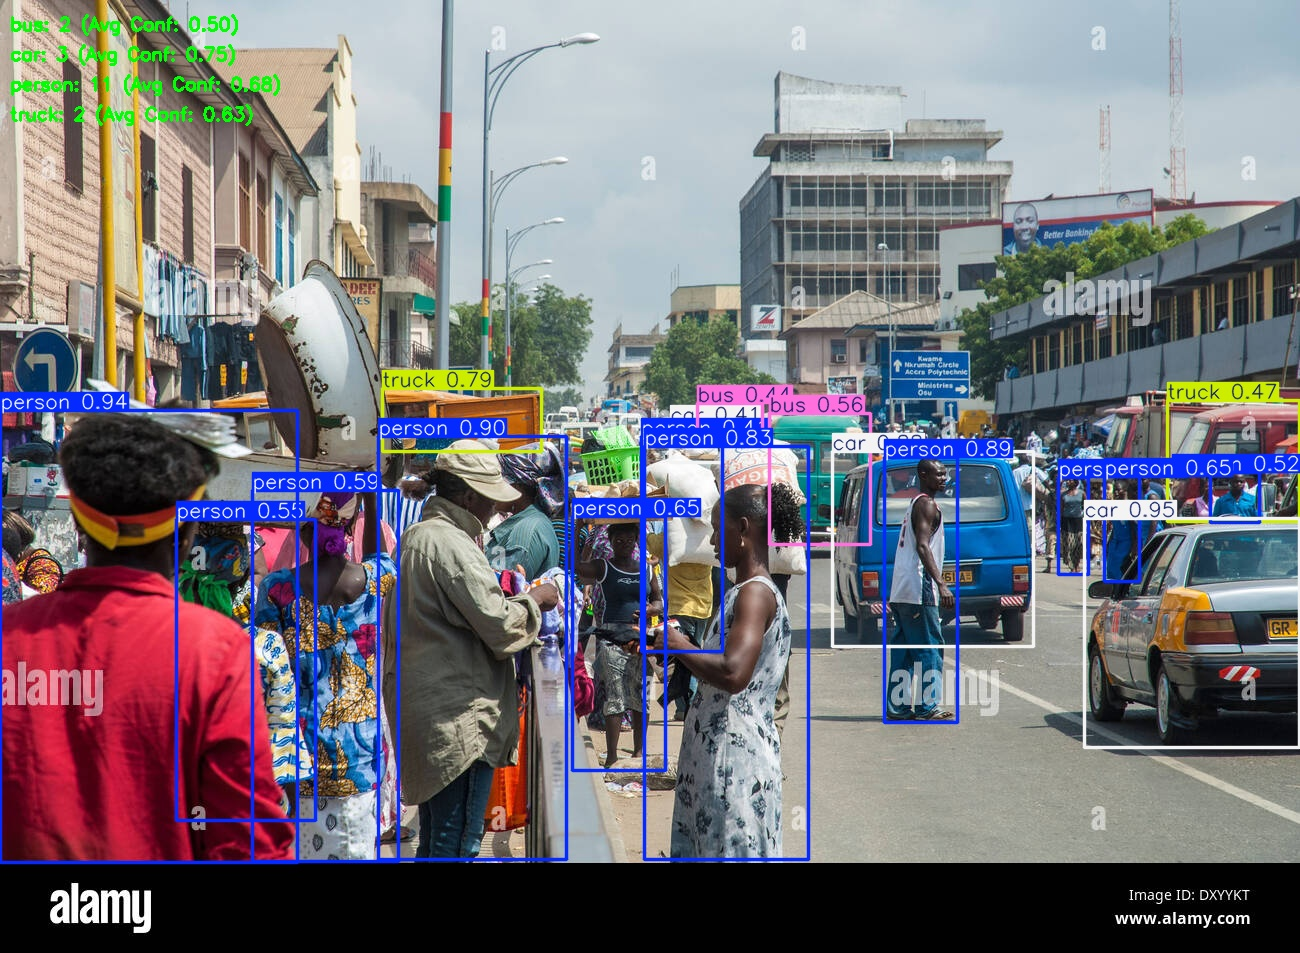

In [ ]:
import cv2
from ultralytics import YOLO
from IPython.display import display, Image
from collections import defaultdict

def detect_objects_accurately(
    source='https://ultralytics.com/images/bus.jpg',
    model_type='yolov8x.pt',  # Best for general detection
    conf_threshold=0.4,  # Balanced confidence threshold
    iou_threshold=0.45,  # NMS IoU threshold to reduce overlaps
    imgsz=640,  # Higher resolution for better accuracy
    max_det=300,  # Maximum detections per image
):
    """
    Enhanced object detection with YOLOv8 for higher accuracy.

    Args:
        source: Image/Video path or URL.
        model_type: 'yolov8x.pt' (best for general objects).
        conf_threshold: Confidence threshold (0.4 balances precision/recall).
        iou_threshold: NMS IoU threshold (0.45 reduces duplicate boxes).
        imgsz: Inference size (higher = more accurate but slower).
        max_det: Maximum detections per image.
    """
    # Load model (downloads automatically if missing)
    model = YOLO(model_type)

    # Run inference with enhanced settings
    results = model.predict(
        source,
        conf=conf_threshold,
        iou=iou_threshold,
        imgsz=imgsz,
        max_det=max_det,
    )

    # Count objects and filter impossible detections
    counts = defaultdict(int)
    confidences = defaultdict(list)  # Store confidences per class

    for result in results:
        for box in result.boxes:
            class_id = int(box.cls)
            class_name = result.names[class_id]
            confidence = float(box.conf)

            # Filter out low-confidence detections
            if confidence >= conf_threshold:
                counts[class_name] += 1
                confidences[class_name].append(confidence)

    # Print sorted results with average confidence
    print("\nACCURATE OBJECT COUNT:")
    for name, count in sorted(counts.items()):
        avg_conf = sum(confidences[name]) / len(confidences[name]) if confidences[name] else 0
        print(f"{name}: {count} (Avg Conf: {avg_conf:.2f})")

    # Display image with bounding boxes
    for r in results:
        im_array = r.plot(line_width=2, font_size=0.7)  # Better visualization

        # Add count and confidence info
        text_y = 30
        for name, count in sorted(counts.items()):
            avg_conf = sum(confidences[name]) / len(confidences[name]) if confidences[name] else 0
            cv2.putText(
                im_array,
                f"{name}: {count} (Avg Conf: {avg_conf:.2f})",
                (10, text_y),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.6,
                (0, 255, 0),
                2,
            )
            text_y += 30

        # Convert and display
        im_rgb = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)
        output_path = 'accurate_detection_result.jpg'
        cv2.imwrite(output_path, im_array)
        display(Image(output_path))

# Example usage
detect_objects_accurately(source='video.jpg')  # Replace with your image


100%|██████████| 137M/137M [00:01<00:00, 115MB/s]



image 1/1 /content/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/yolov5/video.jpg: 960x1280 16 persons, 3 cars, 1 bus, 4 trucks, 18208.5ms
Speed: 12.5ms preprocess, 18208.5ms inference, 675.7ms postprocess per image at shape (1, 3, 960, 1280)

DETECTED OBJECTS (Including Buildings, Roads, etc.):
bus: 1 (Avg Confidence: 0.67)
car: 3 (Avg Confidence: 0.72)
person: 16 (Avg Confidence: 0.62)
truck: 4 (Avg Confidence: 0.59)


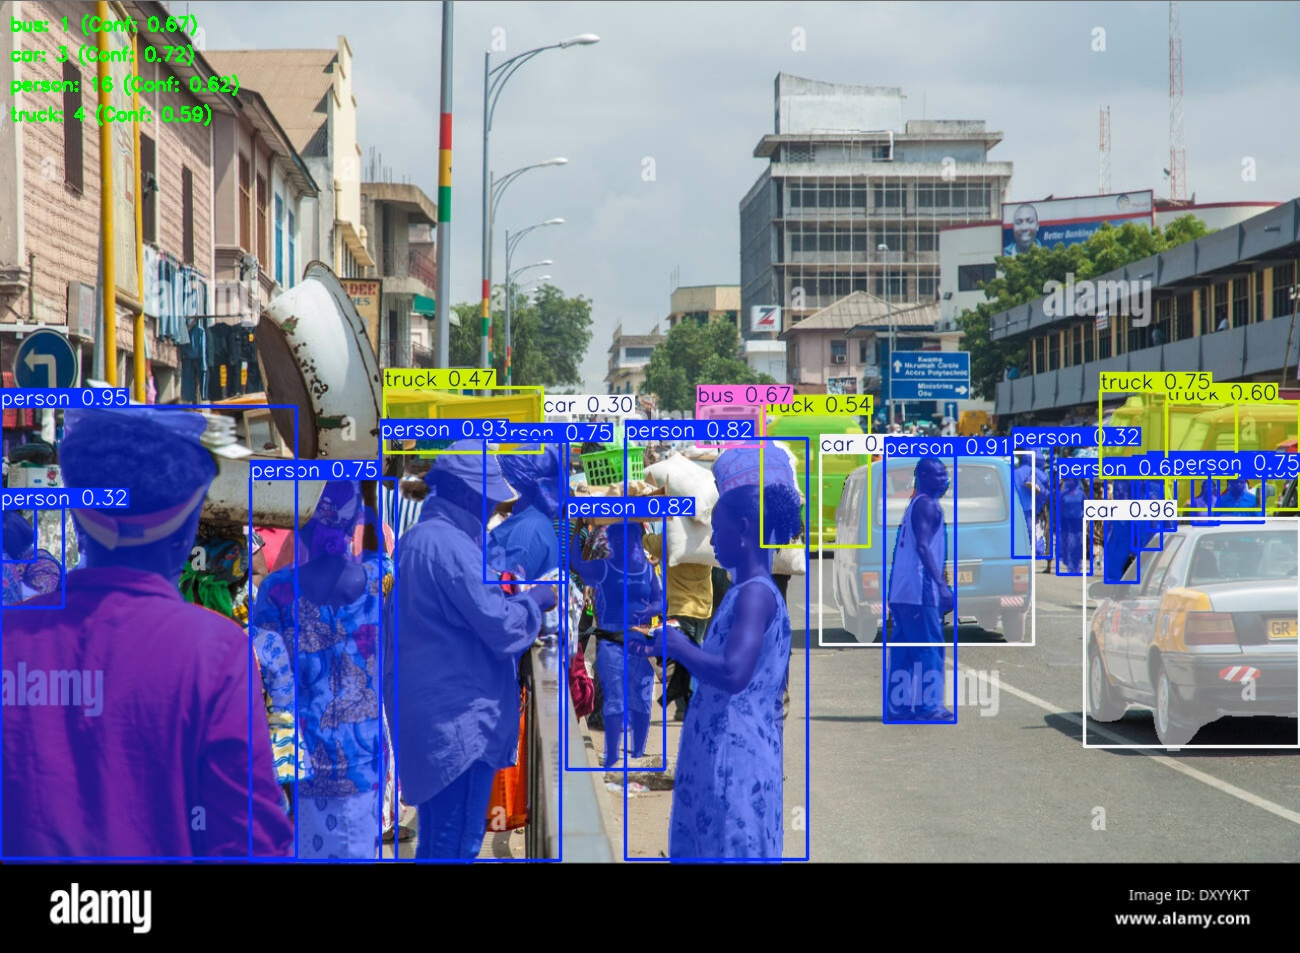

In [ ]:
import cv2
from ultralytics import YOLO
from IPython.display import display, Image
from collections import defaultdict

def detect_all_objects(
    source='your_image.jpg',
    model_type='yolov8x-seg.pt',  # Segmentation model for better detection
    conf_threshold=0.25,  # Lower threshold to detect more objects
    iou_threshold=0.4,  # Helps reduce overlapping boxes
    imgsz=1280,  # Higher resolution for small objects
):
    """
    Detects ALL objects including buildings, roads, bridges, etc.
    """
    # Load model (automatically downloads if missing)
    model = YOLO(model_type)

    # Run inference with optimized settings
    results = model.predict(
        source,
        conf=conf_threshold,
        iou=iou_threshold,
        imgsz=imgsz,
    )

    # Count objects and store confidences
    counts = defaultdict(int)
    confidences = defaultdict(list)

    for result in results:
        for box in result.boxes:
            class_id = int(box.cls)
            class_name = result.names[class_id]
            confidence = float(box.conf)

            if confidence >= conf_threshold:
                counts[class_name] += 1
                confidences[class_name].append(confidence)

    # Print results with average confidence
    print("\nDETECTED OBJECTS (Including Buildings, Roads, etc.):")
    for name, count in sorted(counts.items()):
        avg_conf = sum(confidences[name]) / len(confidences[name]) if confidences[name] else 0
        print(f"{name}: {count} (Avg Confidence: {avg_conf:.2f})")

    # Visualize results
    for r in results:
        im_array = r.plot(line_width=2, font_size=0.7)  # Better visualization

        # Add labels to the image
        text_y = 30
        for name, count in sorted(counts.items()):
            avg_conf = sum(confidences[name]) / len(confidences[name]) if confidences[name] else 0
            cv2.putText(
                im_array,
                f"{name}: {count} (Conf: {avg_conf:.2f})",
                (10, text_y),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.6,
                (0, 255, 0),
                2,
            )
            text_y += 30

        # Save and display
        output_path = 'enhanced_detection_result.jpg'
        cv2.imwrite(output_path, im_array)
        display(Image(output_path))

# Example usage
detect_all_objects(source='video.jpg')  # Replace with your image

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving rap.mp4 to rap.mp4


In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
from collections import defaultdict, OrderedDict
import time
import os
import json
import librosa

class IntervalVideoAnalyzer:
    def __init__(self):
        self.color_map = {
            'person': (0, 255, 0),      # Green
            'stage': (255, 0, 0),        # Blue
            'microphone': (255, 255, 0), # Yellow
            'speaker': (0, 255, 255),    # Cyan
            'vehicle': (0, 0, 255)       # Red
        }
        self.stage_objects = ['mic stand', 'speaker', 'stage', 'dj booth', 'microphone']
        self.track_history = defaultdict(lambda: [])
        self.crowd_heatmap = None
        self.prev_gray = None
        self.beat_frames = []
        self.interval_counts = OrderedDict()
        self.current_interval = 0

    def analyze_video(
        self,
        video_path="rap.mp4",
        output_path="output.mp4",
        model_type="yolov8n.pt",
        conf_threshold=0.4,
        iou_threshold=0.4,
        imgsz=640,
        interval_seconds=10,  # New: Count objects per time interval
        display_live=False,
        analyze_audio=False,
        frame_skip=1,
        export_json=True
    ):
        """Analyze video with interval-based counting and music-specific features"""

        # Load model
        model = YOLO(model_type)

        # Open video
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            raise ValueError("Error opening video file!")

        # Get video properties
        fps = int(cap.get(cv2.CAP_PROP_FPS))
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        duration = total_frames / fps if fps > 0 else 0

        # Calculate interval frames
        interval_frames = int(fps * interval_seconds)
        total_intervals = int(np.ceil(total_frames / interval_frames))

        # Initialize interval tracking
        for i in range(total_intervals):
            self.interval_counts[i] = defaultdict(int)

        # Video writer setup
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

        # Audio analysis (optional)
        if analyze_audio:
            self._analyze_audio(video_path)

        # Main processing loop
        start_time = time.time()
        frame_counter = 0
        prev_time = 0

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            frame_counter += 1
            current_time = frame_counter / fps

            # Skip frames if needed
            if frame_counter % frame_skip != 0:
                continue

            # Determine current interval
            self.current_interval = int(current_time // interval_seconds)
            interval_text = f"Interval {self.current_interval+1}/{total_intervals} ({self.current_interval*interval_seconds}-{(self.current_interval+1)*interval_seconds}s)"

            # Run detection with dynamic confidence
            results = model.predict(
                frame,
                conf=max(0.1, conf_threshold - (frame_counter % 10)/100),
                iou=iou_threshold,
                imgsz=imgsz,
                classes=[0, 1, 2, 3, 5, 7],  # Person, vehicle, stage items etc.
                verbose=False
            )

            # Process results for current frame
            current_counts = self._process_frame(results, frame, width, height, frame_counter, fps)

            # Update interval counts
            for obj, count in current_counts.items():
                self.interval_counts[self.current_interval][obj] += count

            # Visualize results
            annotated_frame = results[0].plot()
            self._add_interval_visuals(
                annotated_frame,
                current_counts,
                width,
                height,
                frame_counter,
                fps,
                current_time,
                interval_text
            )

            # Write to output
            out.write(annotated_frame)

            # Display live if enabled
            if display_live:
                cv2.imshow("Interval Analysis", annotated_frame)
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break

        # Release resources
        cap.release()
        out.release()
        if display_live:
            cv2.destroyAllWindows()

        # Generate reports
        processing_time = time.time() - start_time
        self._generate_reports(processing_time, frame_counter, total_frames, duration, export_json)

        return {
            'interval_counts': self.interval_counts,
            'track_history': self.track_history,
            'crowd_heatmap': self.crowd_heatmap
        }

    def _analyze_audio(self, video_path):
        """Extract and analyze audio for beat detection"""
        audio_file = "temp_audio.wav"
        os.system(f"ffmpeg -i {video_path} -q:a 0 -map a {audio_file} -y")
        y, sr = librosa.load(audio_file)
        _, self.beat_frames = librosa.beat.beat_track(y=y, sr=sr, units='frames')
        os.remove(audio_file)

    def _process_frame(self, results, frame, width, height, frame_num, fps):
        """Process detection results and update tracking"""
        current_counts = defaultdict(int)

        # Process detections
        for r in results:
            for box in r.boxes:
                class_name = r.names[int(box.cls)]
                current_counts[class_name] += 1

                # Track people movement
                if class_name == 'person':
                    center = ((box.xyxy[0][0] + box.xyxy[0][2]) / 2,
                             (box.xyxy[0][1] + box.xyxy[0][3]) / 2)
                    track_id = hash(tuple(box.xyxy[0].cpu().numpy()))
                    self.track_history[track_id].append(center)

        # Motion analysis
        current_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        if self.prev_gray is not None:
            flow = cv2.calcOpticalFlowFarneback(
                self.prev_gray, current_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0
            )
            magnitude = cv2.normalize(
                cv2.magnitude(flow[..., 0], flow[..., 1]), None, 0, 255, cv2.NORM_MINMAX
            )
            if self.crowd_heatmap is None:
                self.crowd_heatmap = np.zeros_like(magnitude)
            self.crowd_heatmap = cv2.addWeighted(self.crowd_heatmap, 0.9, magnitude, 0.1, 0)
        self.prev_gray = current_gray

        return current_counts

    def _add_interval_visuals(self, frame, counts, width, height, frame_num, fps, current_time, interval_text):
        """Add interval-specific visualizations"""

        # Interval information overlay
        cv2.rectangle(frame, (0, 0), (width, 90), (0, 0, 0), -1)
        cv2.putText(frame, interval_text, (10, 30),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
        cv2.putText(frame, f"Time: {current_time:.1f}s", (10, 60),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 1)

        # Current interval counts
        y_offset = 90
        for obj, count in counts.items():
            color = self.color_map.get(obj, (255, 255, 255))
            cv2.putText(frame, f"{obj}: {count}", (width-200, y_offset),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 1)
            y_offset += 25

        # Stage detection
        if any(obj in counts for obj in self.stage_objects):
            cv2.rectangle(frame, (width-220, y_offset), (width, y_offset+30), (0, 0, 200), -1)
            cv2.putText(frame, "STAGE", (width-200, y_offset+20),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 1)
            y_offset += 40

        # Crowd density
        if 'person' in counts:
            density = counts['person'] / (height * width) * 1e6
            cv2.putText(frame, f"Density: {density:.1f} ppm", (width-200, y_offset),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 1)

        # Tracking paths (last 10 positions)
        for track_id, path in self.track_history.items():
            for i in range(max(1, len(path)-10), len(path)):
                cv2.line(frame,
                        (int(path[i-1][0]), int(path[i-1][1])),
                        (int(path[i][0]), int(path[i][1])),
                        (0, 255, 255), 2)

    def _generate_reports(self, processing_time, processed_frames, total_frames, duration, export_json):
        """Generate interval-based reports"""

        fps_processed = processed_frames / processing_time if processing_time > 0 else 0

        print("\n=== INTERVAL-BASED VIDEO ANALYSIS ===")
        print(f"Processing Time: {processing_time:.2f}s")
        print(f"Frames Processed: {processed_frames}/{total_frames} ({processed_frames/total_frames:.1%})")
        print(f"Processing Speed: {fps_processed:.1f} FPS")
        print(f"Video Duration: {duration:.1f}s")

        print("\nINTERVAL COUNTS SUMMARY:")
        for interval, counts in self.interval_counts.items():
            if sum(counts.values()) > 0:
                main_objects = sorted(counts.items(), key=lambda x: -x[1])[:3]
                print(f"Interval {interval+1}: {', '.join(f'{k} ({v})' for k,v in main_objects)}")

        if export_json:
            report = {
                "metadata": {
                    "processing_time": processing_time,
                    "frames_processed": processed_frames,
                    "total_frames": total_frames,
                    "video_duration": duration,
                    "processing_fps": fps_processed
                },
                "interval_counts": {f"interval_{i}": dict(counts)
                                  for i, counts in self.interval_counts.items()},
                "performance_metrics": {
                    "peak_crowd": max(
                        sum(counts.values())
                        for counts in self.interval_counts.values()
                    ),
                    "most_active_interval": max(
                        self.interval_counts.items(),
                        key=lambda x: sum(x[1].values())
                    )[0]
                }
            }
            with open('interval_analysis_report.json', 'w') as f:
                json.dump(report, f, indent=2)
            print("\nFull report saved to 'interval_analysis_report.json'")

# Example usage
if __name__ == "__main__":
    analyzer = IntervalVideoAnalyzer()

    results = analyzer.analyze_video(
        video_path="rap.mp4",
        output_path="DaBaby_interval_analysis.mp4",
        model_type="yolov8n.pt",
        conf_threshold=0.4,
        interval_seconds=15,  # Count objects every 15 seconds
        display_live=False,
        analyze_audio=True,
        frame_skip=2,
        export_json=True
    )

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 74.4MB/s]



=== INTERVAL-BASED VIDEO ANALYSIS ===
Processing Time: 364.21s
Frames Processed: 2967/2967 (100.0%)
Processing Speed: 8.1 FPS
Video Duration: 129.0s

INTERVAL COUNTS SUMMARY:
Interval 1: person (196), car (38), truck (21)
Interval 2: person (262), bus (11), truck (4)
Interval 3: person (422), car (80), truck (15)
Interval 4: person (241), car (23)
Interval 5: person (251), car (21), truck (2)
Interval 6: person (154), car (75), truck (14)
Interval 7: person (172), car (17), truck (10)
Interval 8: person (226)
Interval 9: person (158), car (2)

Full report saved to 'interval_analysis_report.json'


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from ultralytics import YOLO
from collections import defaultdict
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import time

# ====== STATE VARIABLES ======
class ProcessingState:
    def __init__(self):
        self.counting_active = True
        self.skip_frames = 0
        self.speed_multiplier = 1.0
        self.total_counts = defaultdict(int)
        self.current_counts = defaultdict(int)
        self.should_stop = False
        self.reset_counts = False
        self.last_click_time = 0
        self.last_click_button = None
        self.alert_message = ""

state = ProcessingState()

# ====== ALERT DISPLAY ======
alert_area = widgets.Output()

def show_alert(message, duration=2):
    """Show a temporary alert message"""
    state.alert_message = message
    with alert_area:
        clear_output(wait=True)
        display(HTML(f"""<div style="color: white; background: {'#4CAF50' if '✔' in message else '#f44336' if '✖' in message else '#2196F3'};
                        padding: 10px; border-radius: 5px; margin: 10px 0;">
                        {message}
                        </div>"""))
    if duration > 0:
        threading.Timer(duration, clear_alert).start()

def clear_alert():
    """Clear the alert message"""
    with alert_area:
        clear_output(wait=True)

# ====== GUI CONTROLS ======
def create_controls():
    continue_btn = widgets.Button(description="⏸️ Pause", button_style='success')
    skip_btn = widgets.Button(description="⏭️ Skip +5s", button_style='info')
    stop_btn = widgets.Button(description="⏹ Stop", button_style='danger')
    reset_btn = widgets.Button(description="🔄 Reset", button_style='warning')
    slower_btn = widgets.Button(description="⏪ Slower")
    faster_btn = widgets.Button(description="⏩ Faster")

    controls = widgets.HBox([continue_btn, skip_btn, stop_btn, reset_btn, slower_btn, faster_btn])

    def is_double_click(button):
        current_time = time.time()
        is_double = (current_time - state.last_click_time < 0.5) and (button == state.last_click_button)
        state.last_click_time = current_time
        state.last_click_button = button
        return is_double

    def on_continue_clicked(b):
        if is_double_click(b):
            show_alert("✖ Double click: No extra action", 1)
            return

        state.counting_active = not state.counting_active
        continue_btn.description = "▶️ Resume" if not state.counting_active else "⏸️ Pause"
        action = "paused" if not state.counting_active else "resumed"
        show_alert(f"✔️ Video {action}!", 1)

    def on_skip_clicked(b):
        if is_double_click(b):
            skip_seconds = 10
            action = "Skipping 10s (double click)"
        else:
            skip_seconds = 5
            action = "Skipping 5s"

        state.skip_frames += skip_seconds * 30
        show_alert(f"⏭️ {action}...", 1)

    def on_stop_clicked(b):
        if is_double_click(b):
            state.should_stop = True
            show_alert("🛑 Processing stopped!", 2)
        else:
            show_alert("⚠️ Click STOP again to confirm", 1)

    def on_reset_clicked(b):
        if is_double_click(b):
            state.total_counts.clear()
            show_alert("🔄 All counts reset!", 1)
        else:
            state.reset_counts = True
            show_alert("🔄 Current counts reset!", 1)

    def on_slower_clicked(b):
        step = 0.5 if is_double_click(b) else 0.25
        state.speed_multiplier = max(0.1, state.speed_multiplier - step)
        show_alert(f"⏪ Speed: {state.speed_multiplier:.2f}x", 1)

    def on_faster_clicked(b):
        step = 0.5 if is_double_click(b) else 0.25
        state.speed_multiplier = min(8.0, state.speed_multiplier + step)
        show_alert(f"⏩ Speed: {state.speed_multiplier:.2f}x", 1)

    continue_btn.on_click(on_continue_clicked)
    skip_btn.on_click(on_skip_clicked)
    stop_btn.on_click(on_stop_clicked)
    reset_btn.on_click(on_reset_clicked)
    slower_btn.on_click(on_slower_clicked)
    faster_btn.on_click(on_faster_clicked)

    return controls

# ====== VIDEO PROCESSING ======
def process_video(video_path="rap.mp4", output_path="output.mp4"):
    model = YOLO("yolov8x-seg.pt")
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error opening video file")
        return

    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    frame_idx = 0

    # Display controls and alert area
    display(widgets.VBox([create_controls(), alert_area]))

    while cap.isOpened() and not state.should_stop:
        ret, frame = cap.read()
        if not ret:
            break

        # Handle frame skipping
        if state.skip_frames > 0:
            state.skip_frames -= 1
            frame_idx += 1
            continue

        # Handle speed control
        if frame_idx % max(1, int(1 / state.speed_multiplier)) != 0:
            frame_idx += 1
            continue

        # Process frame if counting is active
        if state.counting_active:
            results = model.predict(frame, conf=0.3, iou=0.4, imgsz=640)
            state.current_counts.clear()

            for r in results:
                for box in r.boxes:
                    class_name = r.names[int(box.cls)]
                    state.current_counts[class_name] += 1
                    state.total_counts[class_name] += 1

            annotated_frame = results[0].plot() if results else frame
        else:
            annotated_frame = frame

        # Display status information
        control_text = [
            f"Status: {'⏸️ Paused' if not state.counting_active else '▶️ Running'}",
            f"Speed: {state.speed_multiplier:.2f}x",
            f"Frame: {frame_idx}",
            f"Total Frames: {int(cap.get(cv2.CAP_PROP_FRAME_COUNT))}"
        ]

        y_offset = 30
        for text in control_text:
            cv2.putText(annotated_frame, text, (10, y_offset),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
            y_offset += 30

        # Display current counts
        y_offset += 20
        for obj, count in state.current_counts.items():
            cv2.putText(annotated_frame, f"{obj}: {count}", (20, y_offset),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 1)
            y_offset += 25

        cv2_imshow(annotated_frame)
        out.write(annotated_frame)
        frame_idx += 1

        # Clear output periodically
        if frame_idx % 5 == 0:
            clear_output(wait=True)
            display(widgets.VBox([create_controls(), alert_area]))

        # Small delay to allow button interactions
        time.sleep(0.01)

    cap.release()
    out.release()

    print("\n=== PROCESSING COMPLETE ===")
    print("Final counts:")
    for obj, count in sorted(state.total_counts.items()):
        print(f"{obj}: {count}")

# Run the processing
process_video()

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from ultralytics import YOLO
from collections import defaultdict
import ipywidgets as widgets
from IPython.display import display, clear_output
import time

# ====== GUI CONTROLS ======
controls = widgets.HBox([
    widgets.Button(description="▶️ Continue/Pause", button_style='success'),
    widgets.Button(description="⏭️ Skip +5s", button_style='info'),
    widgets.Button(description="⏹ Stop", button_style='danger'),
    widgets.Button(description="🔄 Reset Counts", button_style='warning'),
    widgets.Button(description="⏪ Slower", button_style=''),
    widgets.Button(description="⏩ Faster", button_style=''),
])
display(controls)

# ====== STATE VARIABLES ======
counting_active = True
skip_frames = 0
speed_multiplier = 1.0  # 1.0 = normal speed, 2.0 = 2x faster
total_counts = defaultdict(int)
current_counts = defaultdict(int)
last_update_time = time.time()

# ====== BUTTON HANDLERS ======
def on_continue_clicked(b):
    global counting_active
    counting_active = not counting_active
    print("⏸️ Paused" if not counting_active else "▶️ Resumed")

def on_skip_clicked(b):
    global skip_frames
    skip_frames += 5 * int(cap.get(cv2.CAP_PROP_FPS))  # Skip 5 seconds
    print(f"⏭️ Skipping next 5 seconds...")

def on_stop_clicked(b):
    global counting_active
    counting_active = False
    print("🛑 Stopped by user!")

def on_reset_clicked(b):
    global total_counts
    total_counts.clear()
    print("🔄 Counts reset!")

def on_slower_clicked(b):
    global speed_multiplier
    speed_multiplier = max(0.25, speed_multiplier / 2)
    print(f"⏪ Speed: {speed_multiplier}x")

def on_faster_clicked(b):
    global speed_multiplier
    speed_multiplier = min(4.0, speed_multiplier * 2)
    print(f"⏩ Speed: {speed_multiplier}x")

# Assign button actions
controls.children[0].on_click(on_continue_clicked)
controls.children[1].on_click(on_skip_clicked)
controls.children[2].on_click(on_stop_clicked)
controls.children[3].on_click(on_reset_clicked)
controls.children[4].on_click(on_slower_clicked)
controls.children[5].on_click(on_faster_clicked)

# ====== VIDEO PROCESSING ======
def process_video(video_path="rap.mp4", output_path="output.mp4"):
    global counting_active, skip_frames, speed_multiplier, total_counts, current_counts

    model = YOLO("yolov8x-seg.pt")
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    frame_idx = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Skip frames if "Skip" was pressed
        if skip_frames > 0:
            skip_frames -= 1
            continue

        # Process at adjusted speed
        if frame_idx % int(1 / speed_multiplier) != 0:
            frame_idx += 1
            continue

        # Detect objects only if counting is active
        if counting_active:
            results = model.predict(frame, conf=0.3, iou=0.4, imgsz=640)
            current_counts.clear()

            for r in results:
                for box in r.boxes:
                    class_name = r.names[int(box.cls)]
                    current_counts[class_name] += 1
                    total_counts[class_name] += 1

            annotated_frame = results[0].plot() if results else frame
        else:
            annotated_frame = frame

        # Display controls and counts
        control_text = [
            f"Controls: {'⏸️ Paused' if not counting_active else '▶️ Running'}",
            f"Speed: {speed_multiplier}x",
            f"Frame: {frame_idx}",
        ]

        y_offset = 30
        for text in control_text:
            cv2.putText(annotated_frame, text, (10, y_offset),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
            y_offset += 30

        # Display current counts
        y_offset += 20
        for obj, count in current_counts.items():
            cv2.putText(annotated_frame, f"{obj}: {count}", (20, y_offset),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 1)
            y_offset += 25

        cv2_imshow(annotated_frame)
        out.write(annotated_frame)
        frame_idx += 1

        # Clear output to avoid stacking frames
        if frame_idx % 10 == 0:
            clear_output(wait=True)
            display(controls)

    cap.release()
    out.release()
    print("\n=== FINAL COUNTS ===")
    for obj, count in sorted(total_counts.items()):
        print(f"{obj}: {count}")

# Run it!
process_video()

In [ ]:
mport os

video_path = r"C:\Users\SCIENCE\Videos\rap.mp4"

print("File exists:", os.path.isfile(video_path))

File exists: False


In [ ]:
import cv2
import time
import asyncio
import numpy as np
from collections import defaultdict
from IPython.display import display, clear_output
from google.colab.patches import cv2_imshow
from ultralytics import YOLO
import ipywidgets as widgets

# ====== GLOBAL STATE ======
counting_active = True
skip_frames = 0
speed_multiplier = 1.0
total_counts = defaultdict(int)
current_counts = defaultdict(int)
cap = None
stop_requested = False  # to stop playback

# ====== GUI BUTTONS ======
btn_continue = widgets.Button(description="▶️ Continue/Pause", button_style='success')
btn_skip = widgets.Button(description="⏭️ Skip +5s", button_style='info')
btn_stop = widgets.Button(description="⏹ Stop", button_style='danger')
btn_reset = widgets.Button(description="🔄 Reset Counts", button_style='warning')
btn_slower = widgets.Button(description="⏪ Slower", button_style='')
btn_faster = widgets.Button(description="⏩ Faster", button_style='')

controls = widgets.HBox([btn_continue, btn_skip, btn_stop, btn_reset, btn_slower, btn_faster])
display(controls)

# ====== BUTTON HANDLERS ======
def on_continue_clicked(b):
    global counting_active
    counting_active = not counting_active
    print("⏸️ Paused" if not counting_active else "▶️ Resumed")

def on_skip_clicked(b):
    global skip_frames, cap
    if cap:
        fps = cap.get(cv2.CAP_PROP_FPS)
        skip_frames += int(5 * fps)
        print("⏭️ Skipping next 5 seconds...")

def on_stop_clicked(b):
    global stop_requested
    stop_requested = True
    print("🛑 Stop requested")

def on_reset_clicked(b):
    global total_counts
    total_counts.clear()
    print("🔄 Counts reset!")

def on_slower_clicked(b):
    global speed_multiplier
    speed_multiplier = max(0.25, speed_multiplier / 2)
    print(f"⏪ Speed: {speed_multiplier:.2f}x")

def on_faster_clicked(b):
    global speed_multiplier
    speed_multiplier = min(4.0, speed_multiplier * 2)
    print(f"⏩ Speed: {speed_multiplier:.2f}x")

# Connect buttons to handlers
btn_continue.on_click(on_continue_clicked)
btn_skip.on_click(on_skip_clicked)
btn_stop.on_click(on_stop_clicked)
btn_reset.on_click(on_reset_clicked)
btn_slower.on_click(on_slower_clicked)
btn_faster.on_click(on_faster_clicked)

# ====== PROCESS VIDEO ======
async def process_video(video_path="rap.mp4", output_path="output.mp4"):
    global counting_active, skip_frames, speed_multiplier, total_counts, current_counts, cap, stop_requested

    model = YOLO("yolov8x-seg.pt")
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    frame_idx = 0
    stop_requested = False

    while cap.isOpened() and not stop_requested:
        await asyncio.sleep(0.001)  # Allow event loop to process buttons

        # If paused, show last frame and wait
        if not counting_active:
            ret, frame = cap.read()
            if not ret:
                break
            clear_output(wait=True)
            display(controls)
            cv2.putText(frame, "⏸️ Paused", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 255), 2)
            cv2_imshow(frame)
            await asyncio.sleep(0.1)
            continue

        # Read frame
        ret, frame = cap.read()
        if not ret:
            break

        # Skip ahead if needed
        if skip_frames > 0:
            skip_frames -= 1
            continue

        # Adjust playback speed
        if speed_multiplier < 1.0:
            await asyncio.sleep((1.0 - speed_multiplier) / fps)

        # Run YOLO detection
        results = model.predict(frame, conf=0.3, iou=0.4, imgsz=640)
        current_counts.clear()

        for r in results:
            for box in r.boxes:
                class_name = r.names[int(box.cls)]
                current_counts[class_name] += 1
                total_counts[class_name] += 1

        # Annotate frame
        annotated_frame = results[0].plot() if results else frame

        # Overlay info
        y_offset = 30
        for line in [
            f"▶️ Running",
            f"Speed: {speed_multiplier:.2f}x",
            f"Frame: {frame_idx}",
            f"Time: {time.strftime('%H:%M:%S', time.gmtime(frame_idx / fps))}"
        ]:
            cv2.putText(annotated_frame, line, (10, y_offset), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
            y_offset += 30

        # Add object counts
        for obj, count in current_counts.items():
            cv2.putText(annotated_frame, f"{obj}: {count}", (20, y_offset),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 1)
            y_offset += 25

        # Show frame
        clear_output(wait=True)
        display(controls)
        cv2_imshow(annotated_frame)
        out.write(annotated_frame)
        frame_idx += 1

    cap.release()
    out.release()

    print("\n=== FINAL COUNTS ===")
    for obj, count in sorted(total_counts.items()):
        print(f"{obj}: {count}")


▶️ Resumed
⏸️ Paused
▶️ Resumed
⏭️ Skipping next 5 seconds...


In [ ]:
await process_video("rap.mp4")